# Ichthys CPF - harmonic fit example

#### Demonstration of simple analysis, evaluation, and prediction

Fitting the ~2 year record of currents

Author: William Edge

Created: 03/10/23

In [1]:
import os
import glob
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from ichthys_harmonics.harmonic_funcs import load_tide_predictions 
from ichthys_harmonics.utils import *

#### Load mooring data

In [2]:
### Select mooring
# moor = 'IchthysP1'
moor = 'Fblock'
# moor = 'Ichthys_CPF'
# moor = 'titanichthys'

# Find data
nc_dir = 'fits'

# Set the prediction time
start = np.datetime64('2024-01-01')
end = np.datetime64('2024-01-14')
time_pred = create_time(start, end, step_minutes=10)

# Set the load order
order = ['BTNS', 'BTEW', 'ITNS', 'ITEW']

# Predict into the future

In [3]:
ds_pred = load_tide_predictions(time_pred, nc_dir, moor, order)
# ds_pred

/mnt/c/Users/00099894/OneDrive - The University of Western Australia/UWA/Inpex/pl/pckgs/ichthys_harmonics/ichthys_harmonics/harmonic_funcs.py:242: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  ds_pred = xr.Dataset(coords={'time': time})
/mnt/c/Users/00099894/OneDrive - The University of Western Australia/UWA/Inpex/pl/pckgs/ichthys_harmonics/ichthys_harmonics/harmonic_funcs.py:108: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to suppor

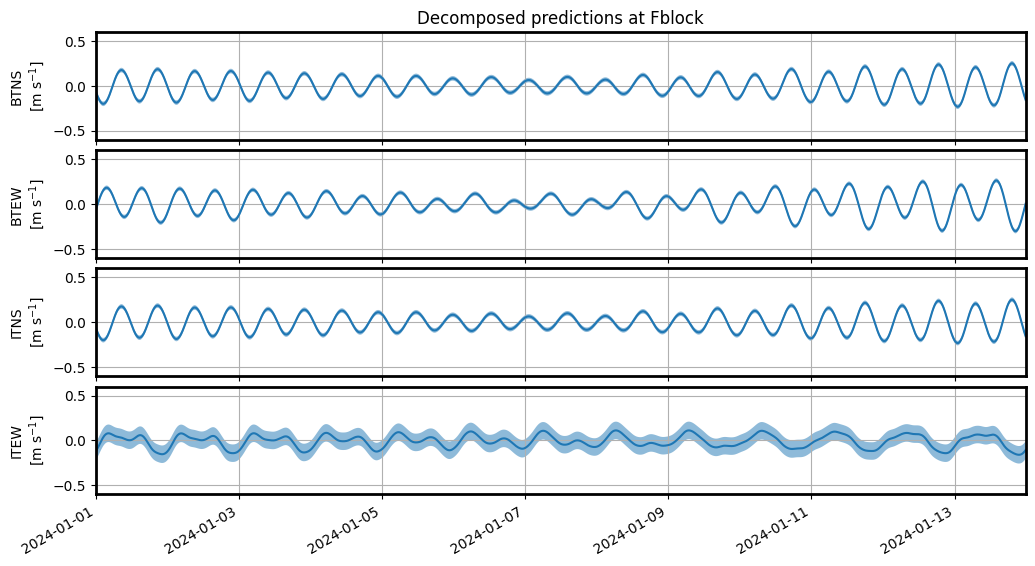

In [5]:
fig, ax = plot_decomposed_currents(ds_pred, order, moor, time_pred)

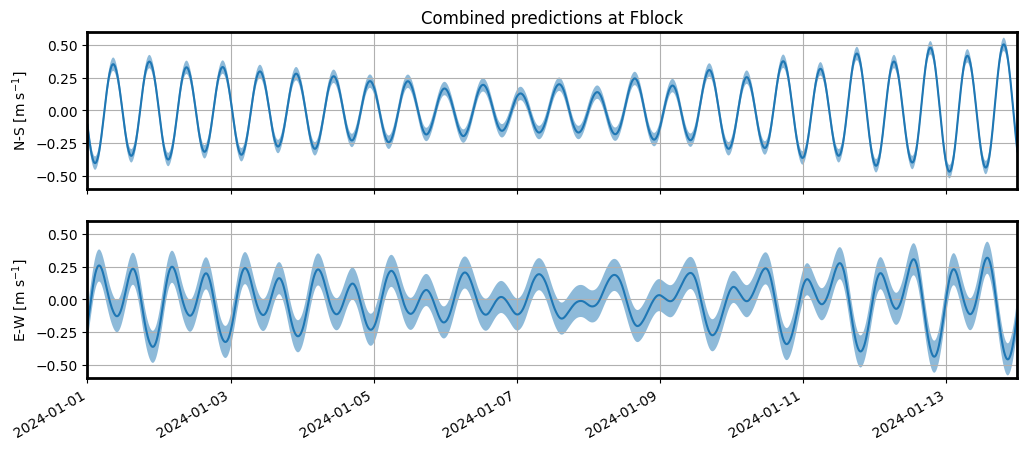

In [6]:
fig, ax = plot_combined_currents(ds_pred, order, moor, time_pred)

Not fully confident that this UQ is correct

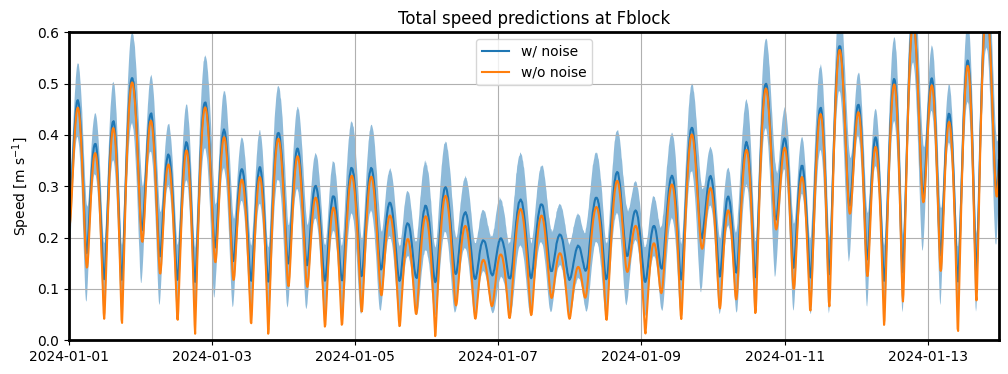

In [7]:
n_samp = 10000
fig, ax = plot_speed(ds_pred, order, moor, time_pred, samples=n_samp)